In [22]:
import os, os.path
from os import listdir
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
from torchvision.utils import save_image, make_grid
from PIL import Image
from IPython.display import display
from utilities import *

In [23]:
data_path = './data/'
images_path = './data/images/'

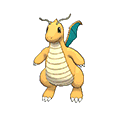

In [24]:
# test image conversion (RGBA with a=0 -> RGB with white background)
# open the image and convert it to RGBA
image = Image.open(images_path + 'dragonite.png').convert('RGBA')
# convert to RGB with white background
rgb_image = rgba_to_rgb_with_white_background(image)
display(rgb_image)

In [33]:
# create dataset
images = []
labels = []
for image_name in os.listdir(images_path):
    # images
    image = Image.open(images_path + image_name)
    rgb_image = rgba_to_rgb_with_white_background(image)
    rgb_image_small = rgb_image.resize((28,28),Image.LANCZOS)
    image_array = np.asarray(rgb_image_small)
    images.append(image_array)
    all_images_array = np.stack(images, axis=0)
    # labels
    labels.append(np.zeros(18)) # 0 for now
    all_labels_array = np.stack(labels, axis=0)
    # save dataset
    with open(data_path + 'images.npy', 'wb') as f:
        np.save(f, all_images_array)
    with open(data_path + 'labels.npy', 'wb') as f:
        np.save(f, all_labels_array)

In [32]:
# check dataset creation
all_images_array = np.load(data_path + 'images.npy', mmap_mode="r")
all_labels_array = np.load(data_path + 'labels.npy', mmap_mode="r")
print(all_images_array.shape) # should be (809, 16, 16, 3)
print(all_labels_array.shape) # should be (809, 18)

(809, 32, 32, 3)
(809, 18)
